In [96]:
# utilizado para manejos de directorios y rutas
import os
# Computacion vectorial y cientifica para python
import numpy as np
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [97]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [98]:
#Carga de dataset
data = pd.read_csv('/content/Cellphone.csv')

In [99]:
#Mostrando dataset
print(data)

     Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0           203   2357    10   135.0         5.20  424         8     1.350   
1           880   1749    10   125.0         4.00  233         2     1.300   
2            40   1916    10   110.0         4.70  312         4     1.200   
3            99   1315    11   118.5         4.00  233         2     1.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
..          ...    ...   ...     ...          ...  ...       ...       ...   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem    ram  RearCam  Front_Cam  battery  thicknes

In [100]:
#Mostrando Informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [101]:
#eliminar columna Product_id
columna_eliminada = 'Product_id'
data.drop(columna_eliminada, axis=1, inplace=True)

In [102]:
#Mostrando dataset con columna eliminada
print(data)

     Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  internal mem  \
0     2357    10   135.0         5.20  424         8     1.350          16.0   
1     1749    10   125.0         4.00  233         2     1.300           4.0   
2     1916    10   110.0         4.70  312         4     1.200           8.0   
3     1315    11   118.5         4.00  233         2     1.300           4.0   
4     1749    11   125.0         4.00  233         2     1.300           4.0   
..     ...   ...     ...          ...  ...       ...       ...           ...   
156   3551  4638   178.0         5.46  538         4     1.875         128.0   
157   3211  8016   170.0         5.50  534         4     1.975         128.0   
158   3260  8809   150.0         5.50  401         8     2.200          64.0   
159   3211  8946   170.0         5.50  534         4     1.975         128.0   
160   2536  9807   202.0         6.00  367         8     1.500          16.0   

       ram  RearCam  Front_Cam  battery

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   weight        161 non-null    float64
 3   resoloution   161 non-null    float64
 4   ppi           161 non-null    int64  
 5   cpu core      161 non-null    int64  
 6   cpu freq      161 non-null    float64
 7   internal mem  161 non-null    float64
 8   ram           161 non-null    float64
 9   RearCam       161 non-null    float64
 10  Front_Cam     161 non-null    float64
 11  battery       161 non-null    int64  
 12  thickness     161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


In [104]:
# Lectura de Datos
columnas_seleccionadas = list(range(1, 13))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 0]
m = y.size

In [105]:
print(X)
print('*'*25)
print(y)

     Sale  weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram  \
0      10   135.0         5.20  424         8     1.350          16.0  3.000   
1      10   125.0         4.00  233         2     1.300           4.0  1.000   
2      10   110.0         4.70  312         4     1.200           8.0  1.500   
3      11   118.5         4.00  233         2     1.300           4.0  0.512   
4      11   125.0         4.00  233         2     1.300           4.0  1.000   
..    ...     ...          ...  ...       ...       ...           ...    ...   
156  4638   178.0         5.46  538         4     1.875         128.0  6.000   
157  8016   170.0         5.50  534         4     1.975         128.0  6.000   
158  8809   150.0         5.50  401         8     2.200          64.0  4.000   
159  8946   170.0         5.50  534         4     1.975         128.0  6.000   
160  9807   202.0         6.00  367         8     1.500          16.0  3.000   

     RearCam  Front_Cam  battery  thick

In [106]:
#normalizar para que esten en un rango.
# esto no modificar, esto usar.
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
#calcular las medias del vector x pero por las filas
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    #obtener la x normalizada
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [107]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Sale  weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram  \
0      10   135.0         5.20  424         8     1.350          16.0  3.000   
1      10   125.0         4.00  233         2     1.300           4.0  1.000   
2      10   110.0         4.70  312         4     1.200           8.0  1.500   
3      11   118.5         4.00  233         2     1.300           4.0  0.512   
4      11   125.0         4.00  233         2     1.300           4.0  1.000   
..    ...     ...          ...  ...       ...       ...           ...    ...   
156  4638   178.0         5.46  538         4     1.875         128.0  6.000   
157  8016   170.0         5.50  534         4     1.975         128.0  6.000   
158  8809   150.0         5.50  401         8     2.200          64.0  4.000   
159  8946   170.0         5.50  534         4     1.975         128.0  6.000   
160  9807   202.0         6.00  367         8     1.500          16.0  3.000   

     RearCam  Front_Cam  battery  thick

In [108]:
# Anade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [109]:
print(X)

[[ 1.00000000e+00 -3.96590165e-01 -3.82572418e-01 ...  8.07867811e-01
  -1.70327419e-01 -6.96210988e-01]
 [ 1.00000000e+00 -3.96590165e-01 -4.90564141e-01 ... -1.04032711e+00
  -8.38100234e-01  4.47564206e-01]
 [ 1.00000000e+00 -3.96590165e-01 -6.52551726e-01 ...  1.14794716e-01
  -6.17955350e-01 -6.04708972e-01]
 ...
 [ 1.00000000e+00  5.31034658e+00 -2.20584833e-01 ...  3.58016019e+00
   1.15860931e-01 -9.70717034e-01]
 [ 1.00000000e+00  5.39920331e+00 -4.60138647e-03 ...  8.07867811e-01
   4.09387443e-01 -4.67455949e-01]
 [ 1.00000000e+00  5.95763864e+00  3.40972128e-01 ...  2.65606273e+00
  -1.04283953e-01 -2.38700910e-01]]


In [110]:
def calcularCosto(X, y, theta):
  m = y.shape[0] # numero de ejemplos de entrenamiento
  J = 0
  #la formula de costo, hipotesis, h o 'y' sombrerito.
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [111]:
#pasarle todas las x, las ys, las theta, alpha, y el numero d iteraciones.

def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  #inicializa algunos valores
  m = y.shape[0] # numero de ejemplos de entrenamiento

  #realiza una copia de theta, el cual sera actualizada por el descenso por el gradiente
  theta = theta.copy()

  J_historico = []

  for i in range(numero_iteraciones):
    #segunda ecuacion de la pagina 44 de la diapositivav
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

theta calculado por el descenso por el gradiente: [2214.88235863  -40.98104182  -51.6194604   -46.93705738  135.82141946
  130.80284234   68.8525834   186.51591691  168.41550429   32.33571836
   42.06723604  122.10929942 -137.54088371]
El precio predecido para un celular (usando el descenso por el gradiente): 2490.5887


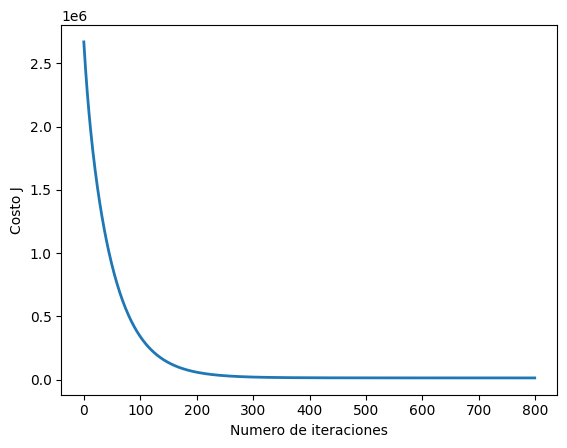

In [112]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_ite = 800

#Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)


# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un celular

X_array = [1, 11, 134, 5.1, 420, 6, 1.33, 16, 2.5, 11, 9, 2590, 7.2]
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta) #se debe cambiar esto

print('El precio predecido para un celular (usando el descenso por el gradiente): {:.4f}' .format(price))

In [113]:
X_array = [1, 11, 134, 5.1, 420, 6, 1.33, 16, 2.5, 11, 9, 2590, 7.2]
X_array[1:13] = (X_array[1:13] - mu) / sigma

In [114]:
X_array[1:13]

[-0.39594157571163563,
 -0.3933715901512839,
 -0.07303598690791893,
 0.6319902647242429,
 0.46907344346724467,
 -0.2890572819272686,
 -0.29607040579428323,
 0.18382463258551995,
 0.10089306190278838,
 1.0388921766512595,
 -0.1850037443508093,
 -0.7877130032436028]

In [115]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [116]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 11, 134, 5.1, 420, 6, 1.33, 16, 2.5, 11, 9, 2590, 7.2]
price = np.dot(X_array, theta)

print('Precio predecido para un celular (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [2215.59627329  -35.07100445  -35.15399368 -116.79590227  135.17584871
  131.51980208   78.86027465  179.46774186  149.57472244   31.09086175
   38.82013625  171.55558953 -161.06491518]
Precio predecido para un celular (usando la ecuación de la normal): $501297
